In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

In [9]:
mu1 = 0.1
mu2 = 0.2
sigma1 = 0.2
sigma2 = 0.3
rho = 0.3
r = 0.05

In [28]:
omega = np.linspace(0,1, 101)

In [29]:
mu = mu1 * omega + mu2 * (1 - omega)
sigma = np.sqrt((sigma1 ** 2) * omega ** 2 + (sigma2 ** 2) * (1 - omega) ** 2 + 2 * rho * sigma1 * sigma2 * omega.dot(1 - omega))

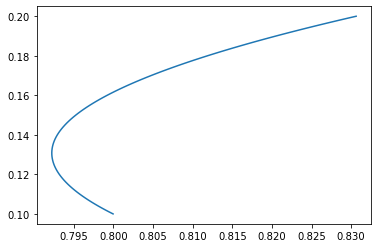

In [30]:
plt.plot(sigma, mu)

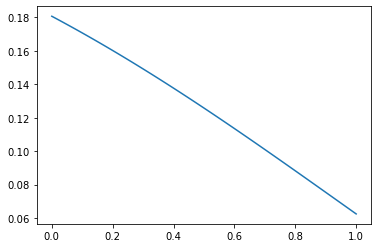

In [31]:
plt.plot(omega, ((mu - r) / sigma))

In [125]:
mu = np.array([
        [0.05], 
        [0.07], 
        [0.15], 
        [0.27],
    ])

sigma = np.array([
        [0.07], 
        [0.12], 
        [0.3], 
        [0.6],
    ])

rho = np.array([   
        [1, 0.8, 0.5, 0.4], 
        [0.8, 1, 0.7, 0.5], 
        [0.5, 0.7, 1, 0.8], 
        [0.4, 0.5, 0.8, 1]
    ])

In [149]:
cov = np.diag(sigma.flatten()) @ rho @ np.diag(sigma.flatten())
I = np.ones(len(mu)).reshape(len(mu), 1)
inv_cov = np.linalg.inv(cov)
A = I.T @ inv_cov @ I
B = I.T @ inv_cov @ mu
C = mu.T @ inv_cov @ mu
min_variance_p = (1 / A) * inv_cov @ I
min_variance_r = B / A
min_variance_vol = np.sqrt (min_variance_p.T @ cov @ min_variance_p)

In [168]:
m = 0.1
omega = (1 / (A * C - B ** 2)) * inv_cov @ ((A * mu - B * I) * m + (C * I - B * mu))
vol = np.sqrt(omega.T @ cov @ omega)

In [150]:
r = 0.025
tangency_p = (1 / (B - A * r)) * inv_cov @ (mu - r * I)
omega_r = (m - r) * inv_cov @ (mu - r * I) / ((mu - r * I).T @ inv_cov @ (mu - r * I))
vol_r = np.sqrt(omega_r.T @ cov @ omega_r)

In [152]:
vol

array([[0.16132773]])

In [187]:
import scipy.optimize as sco

def portfolio_variance (w):
    return w.T @ cov @ w

def neg_sharpe_ratio(w):
    return (-1) * (w.T @ mu - r) / sqrt (portfolio_variance(w))

In [183]:
cons = ({'type': 'eq', 'fun': lambda x: x.T @ I - 1})
bnds = tuple((-5, 5) for x in range(len(mu)))
initial_w = np.array(len(mu)*[1./len(mu)])

sco.minimize(portfolio_variance, initial_w, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-15)

     fun: 0.004178085953590705
     jac: array([0.00835617, 0.00835617, 0.00835617, 0.00835617])
 message: 'Optimization terminated successfully'
    nfev: 90
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([ 1.27488666, -0.26311262,  0.01633934, -0.02811338])

In [184]:
cons = ({'type': 'eq', 'fun': lambda x: x.T @ mu - m},
        {'type': 'eq', 'fun': lambda x: x.T @ I - 1})
bnds = tuple((-5, 5) for x in range(len(mu)))
initial_w = np.array(len(mu)*[1./len(mu)])

sco.minimize(portfolio_variance, initial_w, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-15)

     fun: 0.02602663722503283
     jac: array([0.01552534, 0.03013651, 0.08858121, 0.17624826])
 message: 'Optimization terminated successfully'
    nfev: 55
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.52841211, 0.17288806, 0.15976436, 0.13893547])

In [188]:
cons = ({'type': 'eq', 'fun': lambda x: x.T @ I - 1})
bnds = tuple((-5, 5) for x in range(len(mu)))
initial_w = np.array(len(mu)*[1./len(mu)])

sco.minimize(neg_sharpe_ratio, initial_w, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-15)

     fun: array([-0.46791902])
     jac: array([-0.19420321, -0.19420321, -0.19420319, -0.19420318])
 message: 'Optimization terminated successfully'
    nfev: 88
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([0.71267118, 0.06526608, 0.12436147, 0.09770128])

In [190]:
cons = ({'type': 'eq', 'fun': lambda x: x.T @ mu - m + (1 - x.T @ I) * r})
bnds = tuple((-5, 5) for x in range(len(mu)))
initial_w = np.array(len(mu)*[1./len(mu)])

sco.minimize(portfolio_variance, initial_w, method='SLSQP', bounds=bnds, constraints=cons, tol=1e-15)

     fun: 0.02569100733597252
     jac: array([0.01712734, 0.03082921, 0.08563669, 0.16784791])
 message: 'Optimization terminated successfully'
    nfev: 111
     nit: 22
    njev: 22
  status: 0
 success: True
       x: array([0.88735247, 0.08126327, 0.15484344, 0.12164861])